In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
numTeste = "7"
#tipoTeste = "sw"
tipoTeste = "parimpar"
df = pd.read_table("../Saidas/teste2_sw010/info_sw.txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
#df.reset_index().set_index('index', drop=False)
#df.drop(df[df.Tempo < 110].index, inplace=True)
#df.drop(df[df.Tempo > 260].index, inplace=True)
df["Switch"] = df["Switch"].map({"HW": "Hardware", "SW": "Software"})
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,VezesBloqueado,BytesEnviados,Medicao
0,11,Hardware,2,2,0,0,1
1,11,Software,46,46,0,0,1
2,16,Hardware,2,2,0,0,2
3,16,Software,86,86,0,0,2
4,21,Hardware,82,82,0,0,3
5,21,Software,151,152,0,1512,3
6,26,Hardware,82,82,0,0,4
7,26,Software,200,202,0,1512,4
8,31,Hardware,156,200,0,0,5
9,31,Software,256,262,0,146904,5


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

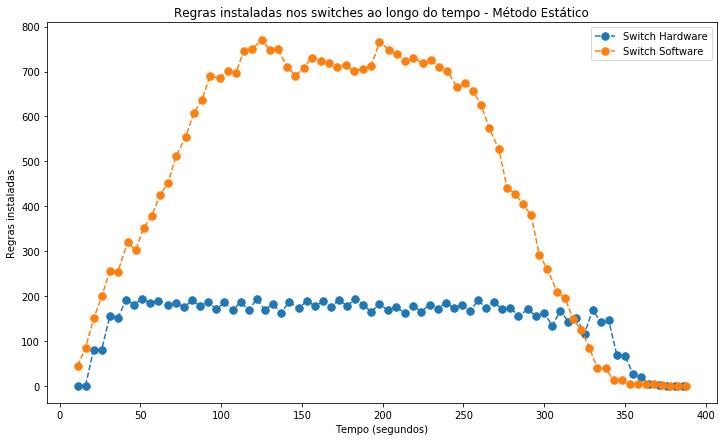

In [5]:
#Agrupando por switch
groups = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")

# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.RegrasInstaladas, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
if(tipoTeste == "parimpar"):
    plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Estático") #u = unicode
else:
    plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Dinâmico")
ax.legend()
#plt.savefig('regrasInstaladas_Tempo_'+tipoTeste+'_teste'+numTeste+'.pdf')
plt.show()